<a href="https://colab.research.google.com/github/cnddlf/2022_1_Study_AI/blob/main/%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C_LDA_Quiz(0303).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 보스턴 주택 가격 데이터 LDA를 이용하여 차원축소하고 KNN을 이용하여 정확도를 구하시오(다음 순서를 참고하여 작성하시오)
> 1. 데이터 얻기
> 2. 학습 및 데이터 나누기
> 3. 데이터 표준화
> 4. 주성분데이터 찾기
> 5. KNN 모델 적용

#1. 데이터 얻기

In [ ]:
from sklearn import datasets

boston = datasets.load_boston()

data = boston['data']
data[:5]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

#2. 표준화

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_std = scaler.fit_transform(data)

#3. 훈련 및 검증 데이터

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_std, boston['target'], random_state=62)

#4. 주성분 데이터 찾기

In [ ]:
# LDA 사용시 label 정보는 정수이어야 함.
y_train = y_train.astype('int')
y_train

array([15, 48, 19, 26, 23, 23, 18, 26, 23, 16, 32, 23, 24, 23, 21, 12, 20,
       13, 37, 22, 19, 14, 33, 17, 18, 22, 28, 24, 24, 11, 10, 37, 24, 20,
       24, 21, 20, 24, 22, 23, 16, 22, 20, 17, 17, 35, 19, 21, 14, 18, 23,
       21, 31,  7, 30, 24, 32, 20, 14, 22, 25, 18, 19, 20, 43, 23, 16, 20,
       23, 26, 26, 15, 10, 21, 21, 50, 13, 43, 23, 25, 20, 23, 24, 19, 22,
        8, 18, 32, 13, 17, 30, 10, 22, 29, 24, 29, 18, 23, 20, 17, 22, 11,
       19, 28, 14, 27, 19, 31, 16, 18, 13, 10, 21, 20, 29, 17, 23, 50, 14,
       18, 14, 34, 50, 13, 22, 22, 16, 13, 45, 50, 20, 26, 10, 14, 22, 14,
       22, 13, 18, 23, 32, 16, 28, 16, 41,  5, 34, 13, 27, 25, 28, 24, 26,
       23, 15, 24, 21, 14, 43, 11, 28,  6, 23, 15, 19, 31, 19, 24, 22, 15,
       21, 16, 24, 21, 22, 12, 30, 17, 27, 10, 10, 21, 34, 18, 14, 22, 25,
       11, 18, 20, 14, 23, 22, 16, 25, 21, 17, 17, 14, 17,  8, 33, 19, 21,
       21, 36, 15, 19, 21, 29, 23, 24, 37,  7, 23, 29, 30, 23, 15, 13, 13,
       19, 22, 20, 21, 17

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.explained_variance_ratio_

array([0.6226411 , 0.13428482, 0.0665114 , 0.04085967, 0.03246797,
       0.02569701, 0.02043952, 0.01881548, 0.01160513, 0.01102314,
       0.00739516, 0.00451698, 0.00374263])

In [ ]:
import numpy as np

x_length = len(X_train[0])
# 막대그래프의 위치를 지정할 정보
x = np.arange(x_length)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

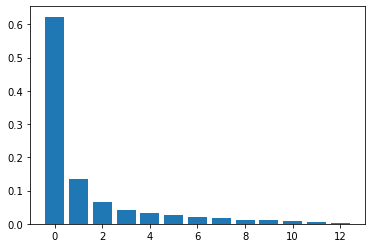

In [ ]:
import matplotlib.pyplot as plt

plt.bar(x, lda.explained_variance_ratio_)
# plt.xticks(x, columns)

plt.show()

#5. K 최근접 이웃모델 적용

##5.1 차원 축소

In [ ]:
# 주성분 분석(PCA) 특성 추출 기법을 적용
n_component_size = 7
lda = LinearDiscriminantAnalysis(n_components=n_component_size)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

##5.2 KNN 모델 생성 및 학습

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = n_component_size)
knn.fit(X_train_lda, y_train)

KNeighborsRegressor(n_neighbors=7)

##5.3 예측

In [ ]:
knn.score(X_test_lda, y_test)

0.8017046115408937

##5.4 차트 확인

In [ ]:
y_predicted = knn.predict(X_test_lda)

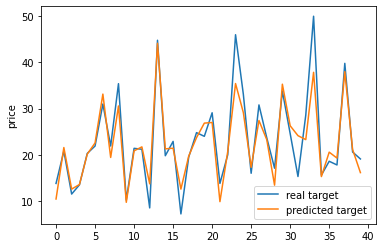

In [ ]:
number_of_sample = 40
plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('price')
plt.legend()
plt.show()

#6. 하이퍼 파라미터

In [ ]:
from sklearn.model_selection import GridSearchCV

def get_best_hyper_paramerter(dt_clf, n_neighbors_list, X_train, y_train):
  params =  {
    'n_neighbors' : n_neighbors_list,
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
  }

  grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='explained_variance', cv=5, verbose=1)
  grid_cv.fit(X_train, y_train)
  print('Best Score: ', grid_cv.best_score_)
  print('Best Hyper Parameter: ', grid_cv.best_params_)

> 위의 하이퍼 파라미터 함수를 이용하여 최적의 파라미터를 구하시오.

In [ ]:
y_train = boston['target'].astype('int')

n_component_size = 7
lda = LinearDiscriminantAnalysis(n_components=n_component_size)
X_train_lda = lda.fit_transform(data_std, y_train)

In [ ]:
# 10단위 리스트

n_neighbors_list = range(1, 91, 10)
knn = KNeighborsRegressor()

In [ ]:
get_best_hyper_paramerter(knn, n_neighbors_list, X_train_lda, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Score:  0.6445111179972716
Best Hyper Parameter:  {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
